Introduction 
During all 10 labs for F21ML we have worked on 4 data sets which are as follows 
1. MNIST Dataset Project
2. WineDataSet
3. Brain
4. RiskPredection




MNIST Dataset Project

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt

In [2]:
image_data = tf.keras.datasets.fashion_mnist

3

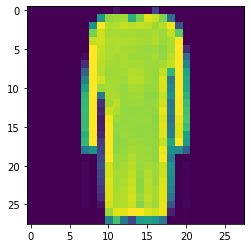

In [4]:
(train_images, train_labels),(test_images,test_labels) = image_data.load_data()
plt.imshow(train_images[25])
train_labels[25]

In [5]:
image_data.data(0)

AttributeError: ignored

WineDataSet

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [14]:
df = pd.read_csv("https://raw.githubusercontent.com/Archit26/SampleDataSet/main/wines_SPA.csv")

In [15]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [17]:
df["region"].value_counts()

Rioja                              2440
Ribera del Duero                   1413
Priorato                            686
Toro                                300
Vino de Espana                      263
                                   ... 
Ribera del Gallego-Cinco Villas       1
Monterrei                             1
Jerez Cream                           1
Condado de Huelva                     1
Abona                                 1
Name: region, Length: 76, dtype: int64

In [18]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


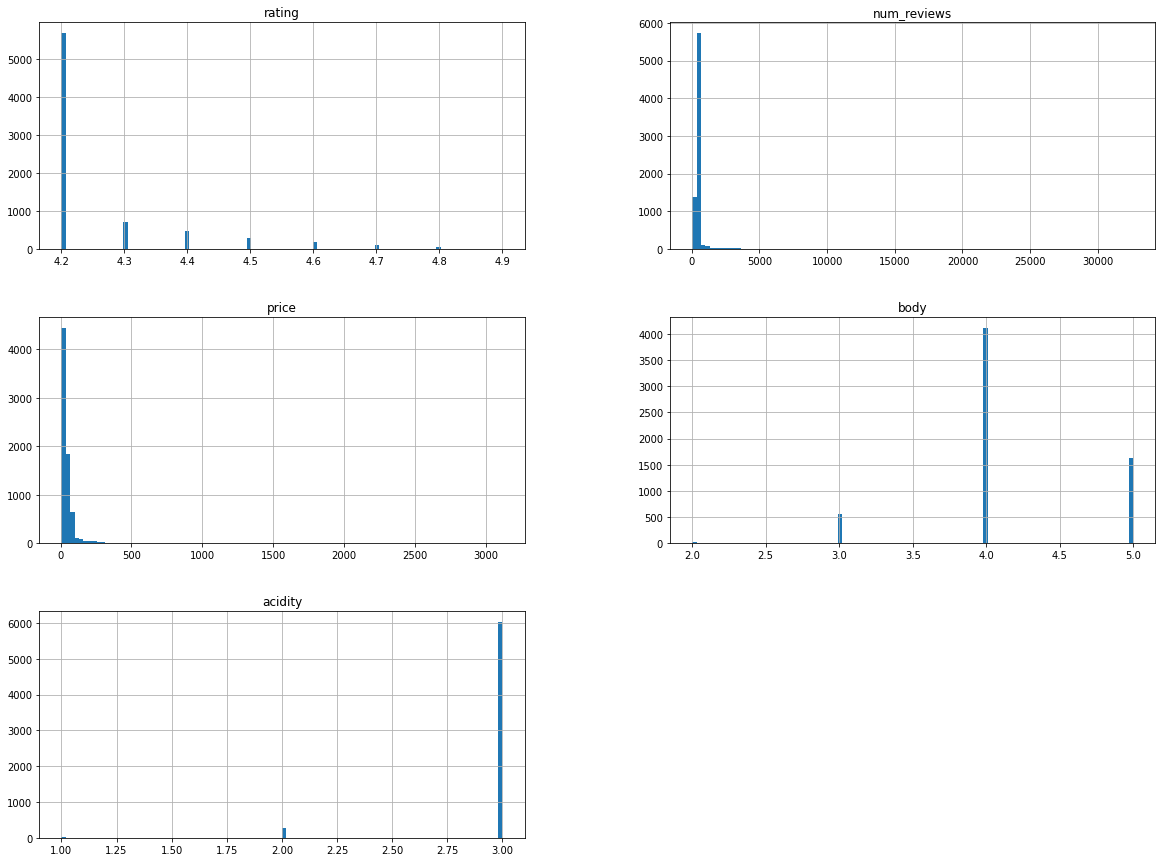

In [19]:
#To plot a histogram for each numerical attribute
df.hist(bins=100, figsize=(20,15))
plt.show()

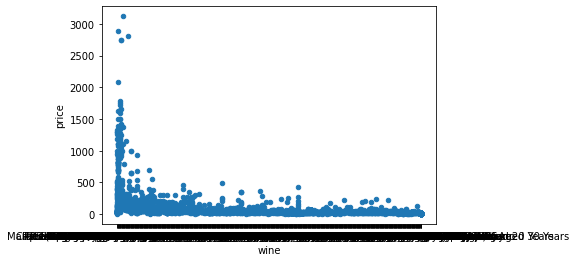

In [20]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
df.plot(kind="scatter", x="wine", y="price")


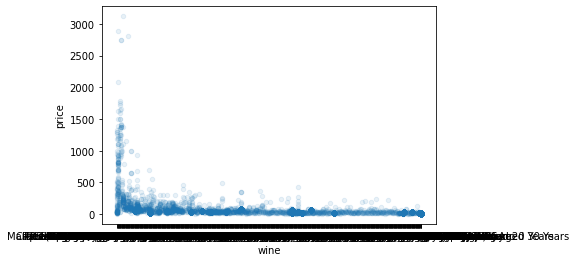

In [21]:
df.plot(kind="scatter", x="wine", y="price",alpha=0.1)

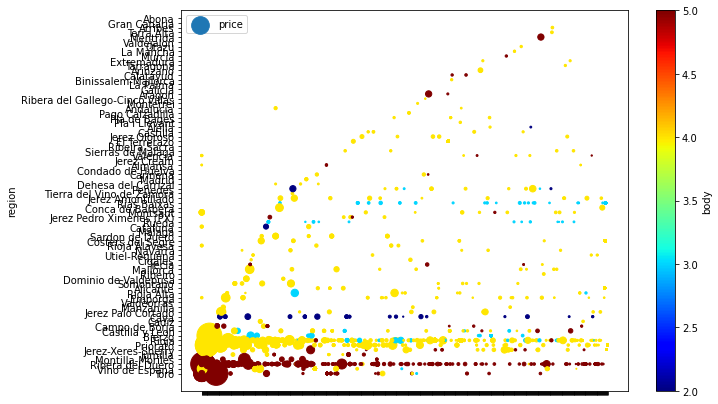

In [22]:
df.plot(kind="scatter", x="wine", y="region",
    s=df["price"]/5, label="price", figsize=(10,7),
    c="body", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
# plots California housing prices:red is expensive, blue is cheap. Large circles indicate areas with larger populations.
# The radius of each circle represents the district’s population(option s) and the color represents the price (option c). 


In [23]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [24]:
corr_matrix["price"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efed71e1610>,
      dtype=object)

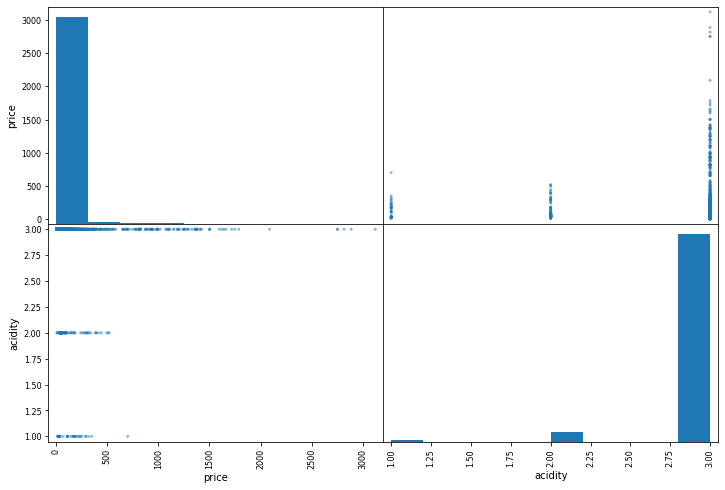

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["price", "wine", "region",
              "acidity"]
scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 16.0, 0.0, 550.0)

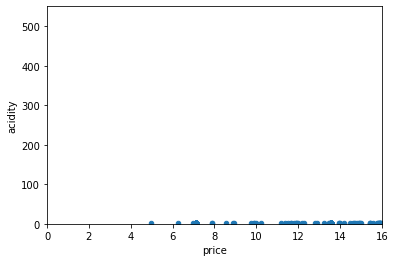

In [27]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
df.plot(kind="scatter", x="price", y="acidity")
plt.axis([0, 16, 0, 550])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

In [28]:
corr_matrix = df.corr()
corr_matrix["acidity"].sort_values(ascending=False)
# Now you are checking the correlations given the new features 
# Q9 Did you get better features ?

acidity        1.000000
num_reviews    0.040138
body          -0.017950
price         -0.032870
rating        -0.094553
Name: acidity, dtype: float64

In [29]:
#housing_labels = housing["median_house_value"].copy()
#housing = housing.drop("median_house_value", axis=1)  # drop the target label as we dont wan
# Now you will start by looking at your missing values
# First revert back to the original data set by dropping the new features  
#df = df.drop("total_estimated_sales", axis=1)  
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [30]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows   # display rows with missing values

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,NaN


In [31]:
# option 1 Remove the records (i.e rows ) with missing values.
sample_incomplete_rows.dropna(subset=["acidity"])  
#Q12 What is displayed below? Note your observation 

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.5,Ribera Del Duero Red,5.0,3.0


In [32]:
sample_incomplete_rows.drop("acidity", axis=1)        # option 2 Remove the entire attribute with the missing value
#Q13  What do you see now? How is this different from your observation in Q12

,winery,wine,year,rating,num_reviews,country,region,price,type,body
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN


In [33]:
median = df["acidity"].median() # calculate the median of total_bedrooms
sample_incomplete_rows["acidity"].fillna(median, inplace=True) # option 3 Fill missing value with  median
# Q14 Note your observation in the displayed rows below. How is it different from Q12 and Q13

In [34]:
sample_incomplete_rows

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
46,Vega Sicilia,Unico Reserva Especial Edicion,NaN,4.7,12421,Espana,Ribera del Duero,423.50000,Ribera Del Duero Red,5.0,3.0
120,Finca Moncloa,Tintilla de Rota,2016,4.7,92,Espana,Cadiz,43.13000,NaN,NaN,3.0
147,Rafael Palacios,Sorte O Soro Val do Bibei,2019,4.7,37,Espana,Valdeorras,194.86000,NaN,NaN,3.0
156,Gutierrez de la Vega,Recondita Armonia Monastrell Dulce,1987,4.7,27,Espana,Alicante,81.90000,NaN,NaN,3.0
254,Costers del Siurana,Dolc de L'Obac,2006,4.6,94,Espana,Priorato,117.23942,NaN,NaN,3.0


In [35]:
from sklearn.impute import SimpleImputer      # Look up SimpleImputer Class in Sklearn Documenation
imputer = SimpleImputer(strategy="median")    # Replace each missing attribute with median of that attribute 

In [36]:
  #We cant compute the median of a categorical data, therefore we are creating a copy of the data without ocean_prox
dp = df.drop("wine", axis=1) 

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['wine']=le.fit_transform(df['wine'])
df['winery']=le.fit_transform(df['winery'])
df['country']=le.fit_transform(df['country'])
df['type']=le.fit_transform(df['type'])
df['region']=le.fit_transform(df['region'])
#df.head()
df.tail()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
7495,159,619,2016,4.2,392,0,59,19.98,12,4.0,3.0
7496,158,440,2018,4.2,390,0,53,16.76,9,4.0,3.0
7497,334,302,2017,4.2,390,0,24,24.45,10,4.0,3.0
7498,316,342,2011,4.2,389,0,57,64.50,11,5.0,3.0
7499,406,596,2016,4.2,388,0,57,31.63,11,5.0,3.0


In [38]:
df.median().values #Check that this is the same as manually computing the median of each attribute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


array([285.  , 496.  ,   4.2 , 404.  ,   0.  ,  57.  ,  28.53,  12.  ,
         4.  ,   3.  ])

LAB 3


In [39]:
features = ['winery','wine','rating','num_reviews','country', 'region', 'type', 'body', 'acidity']
X = df.loc[:, features]
y = df.loc[:, ['price']]
df.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,2013,4.9,58,0,69,995.00,19,5.0,3.0
1,33,819,2018,4.9,31,0,74,313.50,18,4.0,2.0
2,447,778,2009,4.8,1793,0,57,324.95,11,5.0,3.0
3,447,778,1999,4.8,1705,0,57,692.96,11,5.0,3.0
4,447,778,1996,4.8,1309,0,57,778.06,11,5.0,3.0
5,447,778,1998,4.8,1209,0,57,490.00,11,5.0,3.0
6,447,778,2010,4.8,1201,0,57,349.00,11,5.0,3.0
7,447,778,1995,4.8,926,0,57,810.89,11,5.0,3.0
8,447,779,2015,4.8,643,0,57,345.00,11,5.0,3.0
9,447,778,2011,4.8,630,0,57,315.00,11,5.0,3.0


In [40]:
#Another methods to split into input and output components
#data = df.values
#X, y = data[:, :-1], data[:, -1]
#print(X.shape, y.shape)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .70)

In [42]:
print(f"No. of training examples: {X_train.shape}")
print(f"No. of testing examples: {y_test.shape[0]}")

print(f"No. of training examples: {X_train.shape[0]}")
print(f"No. of testing examples: {y_test.shape[0]}")

No. of training examples: (5250, 9)
No. of testing examples: 2250
No. of training examples: 5250
No. of testing examples: 2250


In [43]:
X_test.shape

(2250, 9)

In [44]:
y_train.shape

(5250, 1)

In [45]:
df_matrix=X_train.corr()
df_matrix

,winery,wine,rating,num_reviews,country,region,type,body,acidity
winery,1.000000,-0.159089,-0.039898,-0.010393,NaN,0.046135,-0.120330,0.090017,0.257437
wine,-0.159089,1.000000,0.047778,0.075265,NaN,0.170212,0.154809,-0.021103,-0.185706
rating,-0.039898,0.047778,1.000000,0.022764,NaN,0.050553,-0.021021,0.156913,-0.069724
num_reviews,-0.010393,0.075265,0.022764,1.000000,NaN,0.053048,-0.002607,0.057997,0.036373
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,0.046135,0.170212,0.050553,0.053048,NaN,1.000000,0.280526,0.341874,-0.174459
type,-0.120330,0.154809,-0.021021,-0.002607,NaN,0.280526,1.000000,0.405727,-0.291161
body,0.090017,-0.021103,0.156913,0.057997,NaN,0.341874,0.405727,1.000000,-0.011578
acidity,0.257437,-0.185706,-0.069724,0.036373,NaN,-0.174459,-0.291161,-0.011578,1.000000


In [46]:
df = X_train.drop("country")
df.head()

KeyError: ignored

In [47]:
corr_matrix['rating'].sort_values(ascending=False)

rating         1.000000
price          0.544809
body           0.163033
num_reviews    0.015229
acidity       -0.094553
Name: rating, dtype: float64

In [48]:
corr_matrix['price'].sort_values(ascending=False)

price          1.000000
rating         0.544809
body           0.153624
num_reviews   -0.030083
acidity       -0.032870
Name: price, dtype: float64

In [49]:
corr_matrix['acidity'].sort_values(ascending=False)

acidity        1.000000
num_reviews    0.040138
body          -0.017950
price         -0.032870
rating        -0.094553
Name: acidity, dtype: float64

In [50]:
df1 = X_train.drop(['num_reviews','acidity'], axis=1)
df1.head()

,winery,wine,rating,country,region,type,body
5365,383,496,4.2,0,59,12,4.0
4341,317,260,4.2,0,69,19,5.0
7481,285,56,4.2,0,8,5,3.0
2731,292,639,4.2,0,54,0,3.0
1511,280,421,4.3,0,37,21,NaN


In [51]:
df2=X_train.drop(['body'],axis=1)
df2.head()

,winery,wine,rating,num_reviews,country,region,type,acidity
5365,383,496,4.2,402,0,59,12,3.0
4341,317,260,4.2,400,0,69,19,3.0
7481,285,56,4.2,415,0,8,5,3.0
2731,292,639,4.2,414,0,54,0,3.0
1511,280,421,4.3,94,0,37,21,NaN


In [52]:
df3 = X_train.drop(['num_reviews'], axis=1)
df3.head()

,winery,wine,rating,country,region,type,body,acidity
5365,383,496,4.2,0,59,12,4.0,3.0
4341,317,260,4.2,0,69,19,5.0,3.0
7481,285,56,4.2,0,8,5,3.0,3.0
2731,292,639,4.2,0,54,0,3.0,3.0
1511,280,421,4.3,0,37,21,NaN,NaN


# **      Brain py**
** IMPORTANT NOTES: ** smoking_status > Unknown values So Handling Missing Values before Statistical summary ???


In [53]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [54]:
df = pd.read_csv("https://raw.githubusercontent.com/Archit26/StrokeDataSet/main/brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [55]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [56]:
df["smoking_status"].value_counts()

never smoked       1838
unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

In [57]:
#Know Non-Null and  Dtype value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [58]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [59]:
#ONLY ON NUMERICAL ATTRIBUTES !!!!!! 
#All attributes are numerical, except fields : ever_married, work_type, Residence_type, smoking_status.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Insights from the First Glance

In our dataset, we have both numerical and categorical variables.

It is essential to see whether columns are correctly inferred :

The most important one to look for is our target variable 'stroke' 'Stroke' is detected as an integer, not as an object. Target variable is coded as 1 for positive cases (has a stroke) and 0 for negative cases (does not have a stroke)
Both 'Hypertension' and 'heart disease" are detected as an integer, not as an object. Just remember from the data definition part, they are coded as 1 for the positive cases(has hypertension/heart disease) And 0 for the negative cases (does not have hypertension/heart disease) We don't need to change them, but it is good to see and be aware of it. In addition to them, we have 3 categorical variables, which we have to encode as numerical.

What Problem We Have?

We have binary classification problem. We make prection on the target variable STROKE And we will build a model to get best prediction on the stroke variable.

3) Caterogial Feature
4) Numerical Features
5) Generate a statistical summary
[ ]
↳ 6 cells hidden
6) Bivariate Analysis ??
[ ]
↳ 1 cell hidden
Other Exploratory Data Analysis

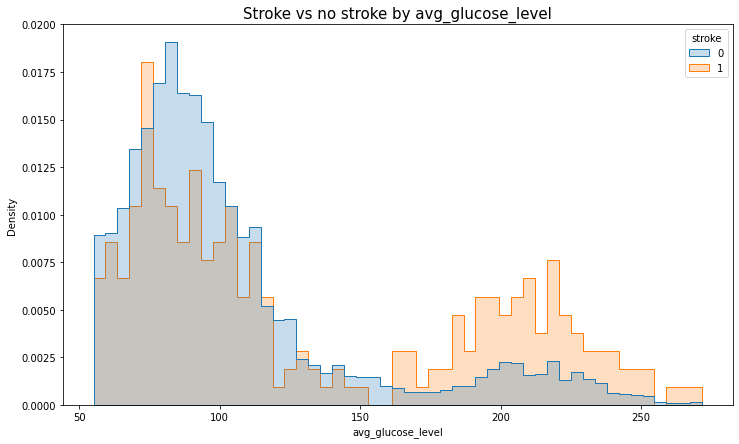

In [60]:
plt.figure(figsize=(12,7))
sns.histplot(
    df, x="avg_glucose_level", hue="stroke",
    element="step",
    stat="density", common_norm=False,
)
plt.title('Stroke vs no stroke by avg_glucose_level', fontsize=15)
plt.show()

## Analysis and Conclusion (Lab 2.1)


With the above parameters, what possibly can the question be? 

Probably:

* Do patience hypertension status correspond with their strok status?
* Does a patient BMI affect the stroke status?
* Are patients that formerly smoked most likely to have stroke?
* Is the average blood glucose level and bmi also a criteria?

# LAB 2.2 : Normalization procedures - Data Processing

---
Data preparation
Cleaning
Integration
Transformation
Reduction
Discretization

---


A) Normalizing values
B) Discretization (binning)
C) Missing Values

- apply the ID3 Decision Tree learning algorithm – but this only works with categorical data. 
- We may want to apply a Neural Network, but this needs the data to be all numeric, and for all values to be relatively small (e.g. between -1 and 1).
Discuss how you fixed problems like missing values, errors or outliers - if applicable. Did you need to apply any pre-processing or normalization procedures? If so, why?
ts just aplicable to categorical data, so there is no need to "normalize" what is already categorical.

Although, the rest of numerical data should be normalized.
A) Data Preprocessing
B1) Dealing with Missing/Unknown values

B2) Exploratory Data Analysis EDA (convert categorical variables to numbers - Encode)

B3) Normalizing - the rest of numerical data should be normalized

B1) Dealing with Missing/Unknown values

In [61]:
df.isna()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


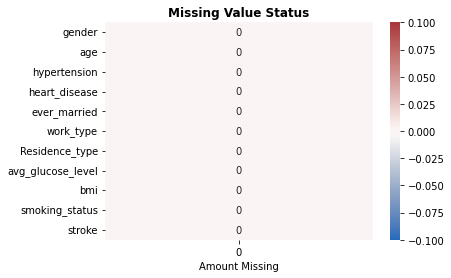

In [62]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

In [63]:
df.info()
df.isnull().sum()  #no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

B2) Exploratory Data Analysis EDA :
Convert categorical variables to numbers --> Encoders

LabelEncoder. --> 2 parameters

gender (Female, Male)
ever_married (Yes, No)
Residence_type (Rural, Urban)
OrdinalEncoder. --> More than 2 parameters

work_type (Private, Self-employement, children, Govt_job) {work_type_Govt_job work_type_Private work_type_Self-employed work_type_children smoking_status_Unknown}
smoking_status (never smoked, Unknown, formerly smoked, smokes) {smoking_status_formerly smoked smoking_status_never smoked smoking_status_smokes}
REMINDER

LabelBinarizer: for converting bin_values(Yes or NO, True or Flase) into (0 & 1).

LabelEncoder:Used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

OrdinalEncoder:In ordinal encoding, each unique category value is assigned an integer value.For example, “red” is 1, “green” is 2, and “blue” is 3.This is called an ordinal encoding or an integer encoding and is easily reversible. Often, integer values starting at zero are used.

In [64]:
df_uniques = df.nunique() 
df_uniques

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               4
Residence_type          2
avg_glucose_level    3895
bmi                   342
smoking_status          4
stroke                  2
dtype: int64

In [65]:
# 2 parameters : > Encoders
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["ever_married"] = le.fit_transform(df["ever_married"])
df["Residence_type"] = le.fit_transform(df["Residence_type"])

In [66]:
# 2 parameters : > OrdinalEncoder
oe = OrdinalEncoder()
df[["work_type","smoking_status"]] = oe.fit_transform(df[["work_type","smoking_status"]])

In [67]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1.0,1,228.69,36.6,0.0,1
1,1,80.0,0,1,1,1.0,0,105.92,32.5,1.0,1
2,0,49.0,0,0,1,1.0,1,171.23,34.4,2.0,1
3,0,79.0,1,0,1,2.0,0,174.12,24.0,1.0,1
4,1,81.0,0,0,1,1.0,1,186.21,29.0,0.0,1


In [68]:
df.smoking_status.value_counts() 

1.0    1838
3.0    1500
0.0     867
2.0     776
Name: smoking_status, dtype: int64

In [69]:
df1 = pd.get_dummies(df, columns=["work_type", "smoking_status"])

Data Preprocessing
In scaling, you're changing the range of your data, while in normalization, you're changing the shape of the distribution of your data

Scaling 2 techniques:

-> min/max scaling

-> Standardization scaling

In [70]:
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [71]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,1,1.0,1,0.0,1,2.723411,1.193238,1.040584
1,1,0,1,1,1.0,0,1.0,1,-0.000523,0.589390,1.614270
2,0,0,0,1,1.0,1,2.0,1,1.448529,0.869222,0.246250
3,0,1,0,1,2.0,0,1.0,1,1.512650,-0.662492,1.570141
4,1,0,0,1,1.0,1,0.0,1,1.780895,0.073909,1.658400
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0,0,0,1.0,0,0.0,0,-0.794162,0.191733,-0.106788
4977,1,0,0,1,1.0,1,2.0,0,1.890500,0.383197,-0.150917
4978,0,1,0,1,0.0,0,2.0,0,-0.242364,0.486294,0.069731
4979,1,0,0,1,1.0,0,2.0,0,-0.488199,0.221189,-0.150917


LAB 3 : Correlation

In [72]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = df.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

In [73]:
  #corr_matrix["age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

In [74]:
#from pandas.plotting import scatter_matrix

#attributes = ["age", "heart_disease", "hypertension","avg_glucose_level"]
#scatter_matrix(df[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other

(0.0, 16.0, 0.0, 5500.0)

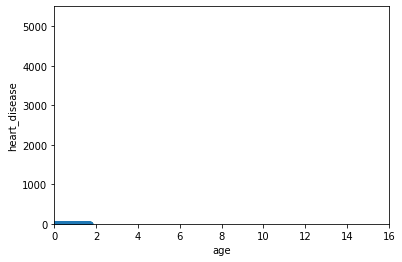

In [75]:
# let’s zoom in on the correlation scatterplot "median house value & the median income,"
df.plot(kind="scatter", x="age", y="heart_disease",
             alpha=0.1)
plt.axis([0, 16, 0, 5500])

In [76]:
corr_matrix["age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.median house value)?
# Does that make sense? 

age                  1.000000
ever_married         0.677137
bmi                  0.373703
hypertension         0.278120
heart_disease        0.264852
stroke               0.246478
avg_glucose_level    0.236763
Residence_type       0.017155
gender              -0.026538
smoking_status      -0.377088
work_type           -0.415935
Name: age, dtype: float64

In [77]:
correlation=df.corr()

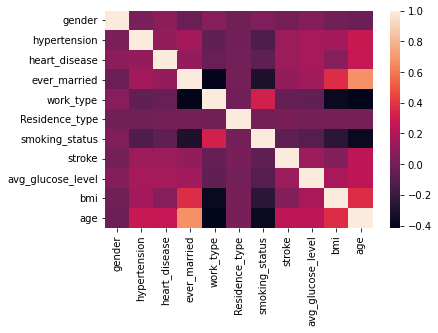

In [78]:
sns.heatmap(correlation,annot=False)

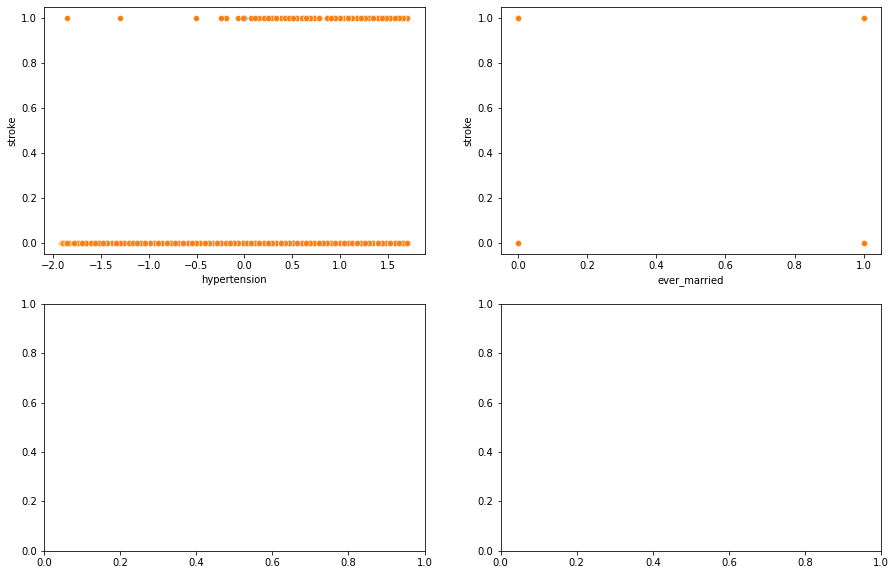

In [79]:
# correlation can be found out between continuous variables usir
fig,axis=plt.subplots(2,2,figsize=(15,10))
sns.scatterplot(x='hypertension', y= 'stroke', data=df, ax=axis [0,0])
sns.scatterplot(x='ever_married', y='stroke', data=df, ax=axis[0,1])
sns.scatterplot(x='age', y= 'stroke', data=df, ax=axis [0,0])
sns.scatterplot(x='ever_married', y='stroke', data=df, ax=axis[0,1])
plt.show()

▶ Generate correlation matrix and scatter plot

Find most correlated attributes to output label • (optional for BSc but recommended for higher marks, mandatory for MSc) Experiment with various feature selection (feature reduction) methods • (optional, possibly for higher marks) Gain more confidence with using Computer Vision or high- dimensional real world data sets


**LAB 4 :**
 Classification Testing and Evaluation
Do patience hypertension status correspond with their strok status? Does a patient BMI affect the stroke status? Are patients that formerly smoked most likely to have stroke? Is the average blood glucose level and bmi also a criteria?

In [80]:
X = df.drop(['stroke'], axis=1).values 
y = df['stroke'].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3486, 10)
(3486,)
(1495, 10)
(1495,)


accuracy, TP rate, FP rate, precision, recall, F measure, the ROC area

## Random Forest

In [83]:
rf_c = RandomForestClassifier()
rf_c.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score

In [88]:
      print('Accuracy:', accuracy_score(y_test, y_pred))
      print('-'*5)

      print('Train Score:', rf_c.score(X_train, y_train))
      print('Test Score:', rf_c.score(X_test, y_test))

      print('-'*5)
      print('Precision', precision_score(y_test, y_pred))
      print('Recall:', recall_score(y_test, y_pred))
      print('F1 Score:', f1_score(y_test, y_pred))

      

NameError: ignored

In [87]:
AccScore = accuracy_score(y_test, y_pred, normalize=False)

NameError: ignored

## Decision Tree

In [89]:
from sklearn.metrics import accuracy_score
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

NameError: ignored

In [90]:
from sklearn.metrics import f1_score
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

NameError: ignored

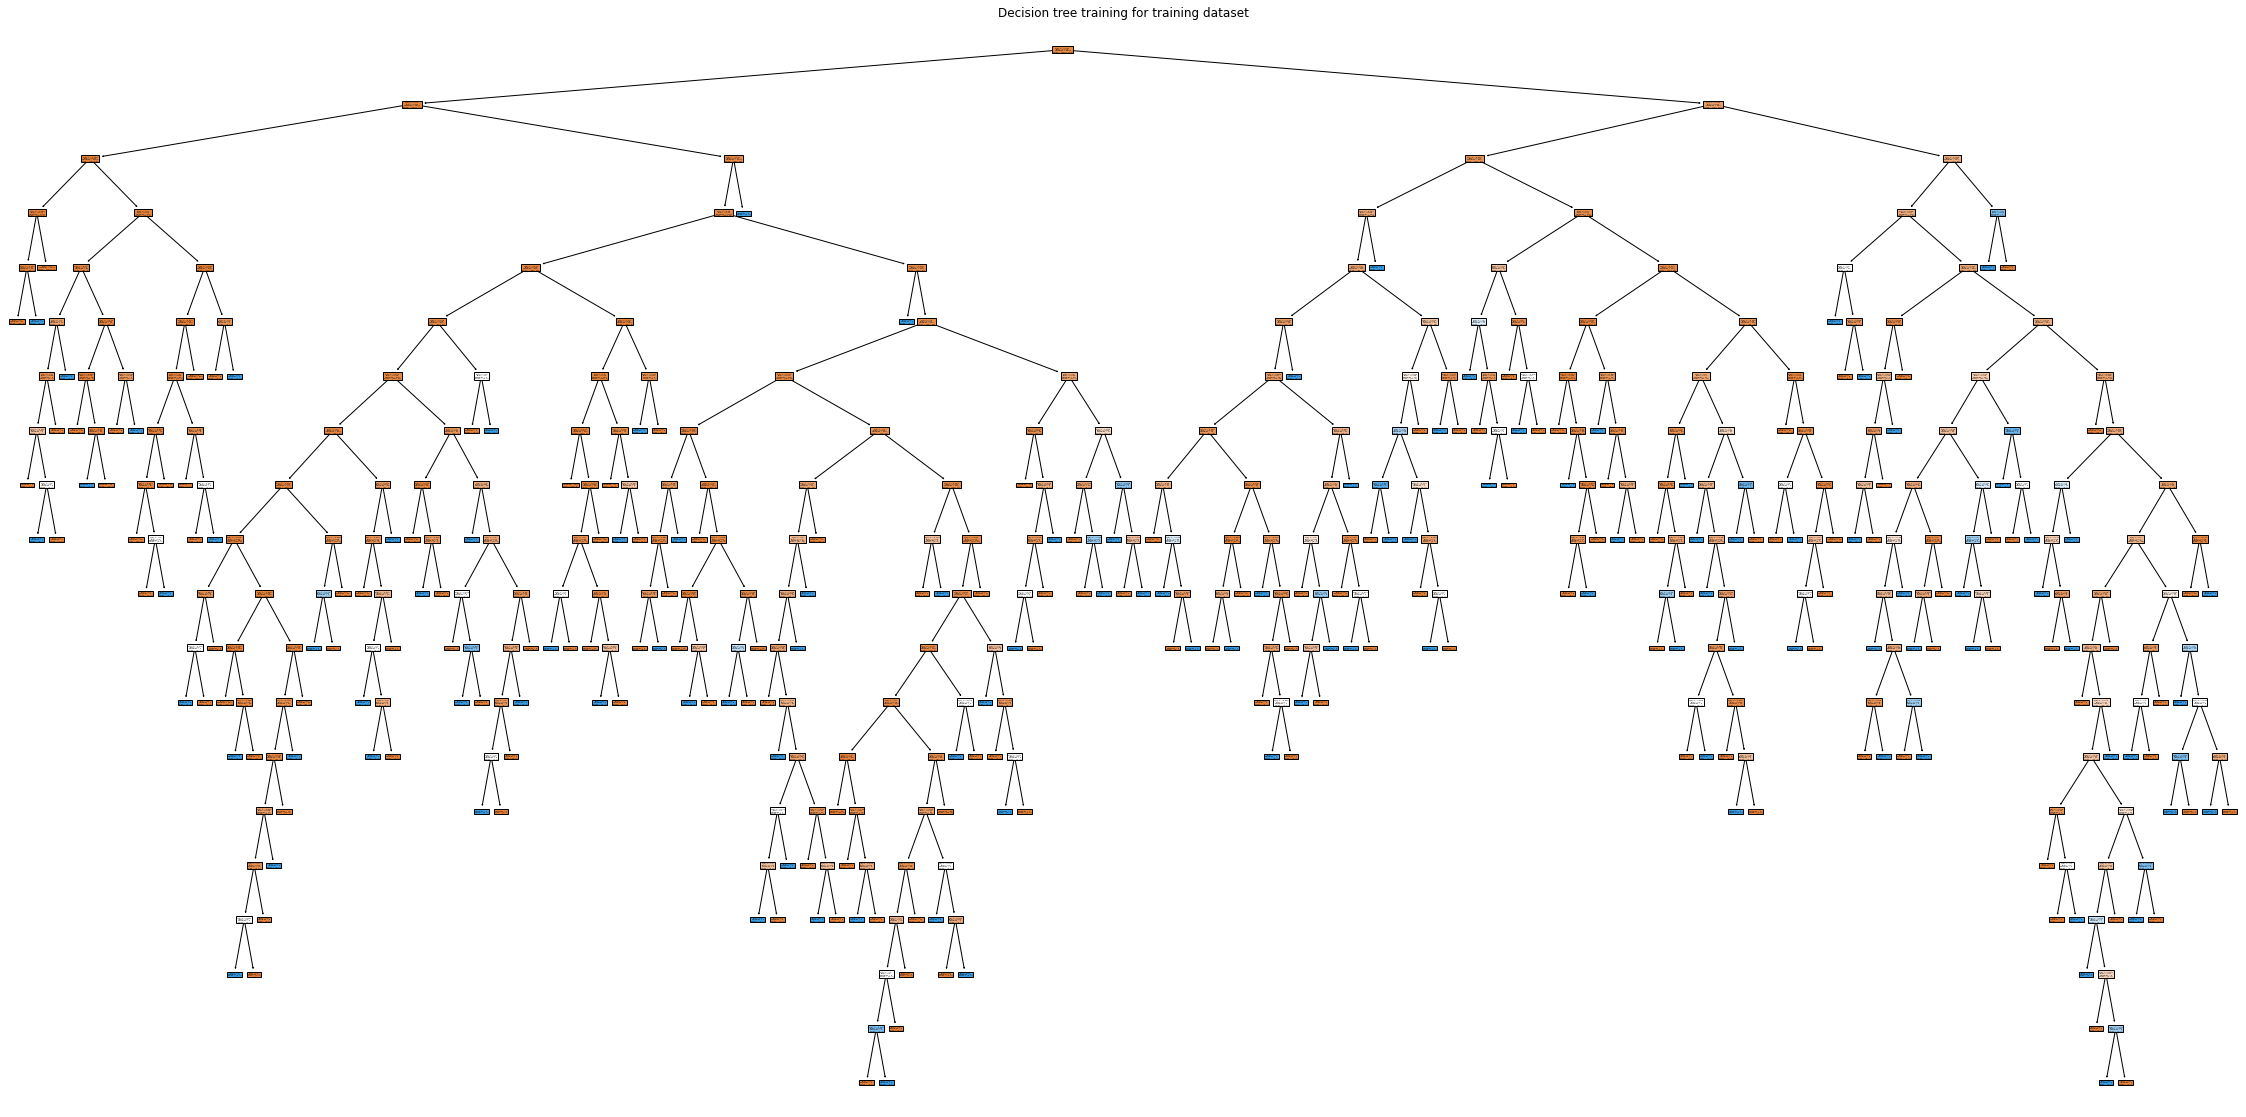

In [91]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(X_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

In [92]:
## Logistic Regression

In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print('Testing Score \n',score)
logistic_score = model.score(X_train, y_train)
logistic_test = model.score(X_test, y_test)
#== 
y_pred= model.predict(X_test)
print(classification_report(y_test, y_pred))


Testing Score 
 0.9558528428093646
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1427
           1       1.00      0.03      0.06        68

    accuracy                           0.96      1495
   macro avg       0.98      0.51      0.52      1495
weighted avg       0.96      0.96      0.94      1495



### RiskPredection 

>4TH  data set




In [94]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


#classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [95]:
data = pd.read_csv("https://raw.githubusercontent.com/Archit26/RiskAnalysis/main/german_credit_data.csv")
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [97]:

data.dtypes.value_counts()

object    6
int64     5
dtype: int64

In [98]:
# First let's to checkout the missing values do we have on this dataframe and the we can decide to clean up (remove) them,
# or leave them !!!
missing_values = data.isnull().sum() # get the number of missing data points per column.
missing_values[:] # look at the whole missing points at all columns

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [99]:
# This time we do need to know the percentage %  of the mssing values in the dataset!!!

total_cells = np.product(data.shape) # returns the product of array elements over a given axis.
total_missing = missing_values.sum()
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

5.245454545454545


In [100]:
# it seems like we do not have that huge amout of missing values , but now we want to remove ,
# Some columns like (bmi) cuz it contains some NAN"S and that is going to affect the ML model work when it comes to predictions.

data.drop(['Unnamed: 0'],axis=1, inplace=True) #Remove rows or columns by specifying label names and corresponding axis,
# or by specifying directly index or column names.

In [101]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [102]:
data.describe(include='object') # here by adding this argument (include='object') it allows us to look across the object(string) value

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,817,606,1000,1000
unique,2,3,4,3,8,2
top,male,own,little,little,car,good
freq,690,713,603,274,337,700


In [103]:
data1=data.dropna()

In [104]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
7,35,male,3,rent,little,moderate,6948,36,car,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [105]:
data1.shape

(522, 10)

# Encoding


In [106]:
data_uniques = data1.nunique() 
# Count number of distinct elements in specified axis. 
#Return Series with number of distinct elements. Can ignore NaN values.
data_uniques

Age                  52
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       503
Duration             30
Purpose               8
Risk                  2
dtype: int64

In [107]:
binary_vals = list(data_uniques[data_uniques == 2].index) # Create alist for our bin_vales (composed of at least two values)
binary_vals

['Sex', 'Risk']

In [108]:
data1[binary_vals].dtypes # Check the datatypes in case if it needs to be encoded (converted into numaric values^_^)

Sex     object
Risk    object
dtype: object

In [109]:
categorical_vals  = list(data_uniques[(data_uniques > 2) & (data_uniques <=6)].index)
# This function allow us to determine how many categorical do we have actually those are more than 2 and less than 6
categorical_vals

['Job', 'Housing', 'Saving accounts', 'Checking account']

In [110]:
[[i, list(data1[i].unique())] for i in categorical_vals] 

[['Job', [2, 3, 1, 0]],
 ['Housing', ['own', 'free', 'rent']],
 ['Saving accounts', ['little', 'moderate', 'quite rich', 'rich']],
 ['Checking account', ['moderate', 'little', 'rich']]]

In [111]:
numaric_vals = list(set(data1.columns) - set(categorical_vals)- set(binary_vals))
# Extending the numaric values among cate_vals, dataframe columns and bin_values
numaric_vals

['Credit amount', 'Duration', 'Purpose', 'Age']

In [112]:


from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

In [113]:
lb, le, lo = LabelBinarizer(), LabelEncoder(), OrdinalEncoder()

In [114]:
for col in categorical_vals: 
  data1[col] = le.fit_transform(data1[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
for col in binary_vals:
  data1[col] = lb.fit_transform(data1[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,radio/TV,0
3,45,1,2,0,0,0,7882,42,furniture/equipment,1
4,53,1,2,0,0,0,4870,24,car,0
7,35,1,3,2,0,1,6948,36,car,1
9,28,1,3,1,0,1,5234,30,car,0


In [117]:
data1.Risk.value_counts() 
# Return a Series containing counts of values in our Y (target) after encoding ,
# 1 refers to have Stroke & 0 refers to don't have Stroke

1    291
0    231
Name: Risk, dtype: int64

In [118]:
data1.drop(['Purpose'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [119]:
data1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
1,22,0,2,1,0,1,5951,48,0
3,45,1,2,0,0,0,7882,42,1
4,53,1,2,0,0,0,4870,24,0
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,0


# Data Presentation

(array([231.,   0.,   0.,   0., 291.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 5 Patch objects>)

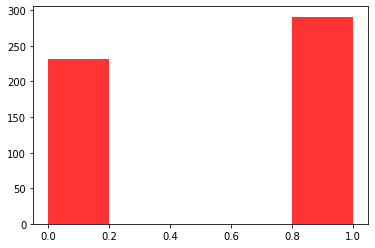

In [120]:
# create a histogram: 

ax = plt.axes()
ax.hist(data1.Risk, bins=5, alpha=0.8, color='red')

In [121]:
# Create Feature columns :
features_col = [x for x in data1.columns if x not in 'Risk']
features_col

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration']

In [122]:
data1[features_col]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
1,22,0,2,1,0,1,5951,48
3,45,1,2,0,0,0,7882,42
4,53,1,2,0,0,0,4870,24
7,35,1,3,2,0,1,6948,36
9,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24
993,30,1,3,1,0,0,3959,36
996,40,1,3,1,0,0,3857,30
998,23,1,2,0,0,0,1845,45


In [123]:
#data1 change needed

# Train and Test Dataset

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
x_train, x_test, y_train, y_test = train_test_split(data1[features_col], data1['Risk'])

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier 

In [127]:
# Creating the model 
tree_model = DecisionTreeClassifier(random_state=12)

In [128]:
# giving data to model
tree_model = tree_model.fit(x_train, y_train)

In [129]:
# Determine the number of nodes and maximum depth:
tree_model.tree_.node_count, tree_model.tree_.max_depth

(233, 18)

# Error Metrice

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [131]:
def measure_error(y_true, y_pred, label):
  return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                    'precision': precision_score(y_true, y_pred),
                    'recall': recall_score(y_true, y_pred),
                    'f1': f1_score(y_true, y_pred)},
                   name=label)

In [132]:
y_train_pred = tree_model.predict(x_train)

In [133]:
y_test_pred = tree_model.predict(x_test)

In [134]:
full_error_scores = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred,'test')],axis=1)

In [135]:
full_error_scores

,train,test
accuracy,1.0,0.625954
precision,1.0,0.683544
recall,1.0,0.692308
f1,1.0,0.687898


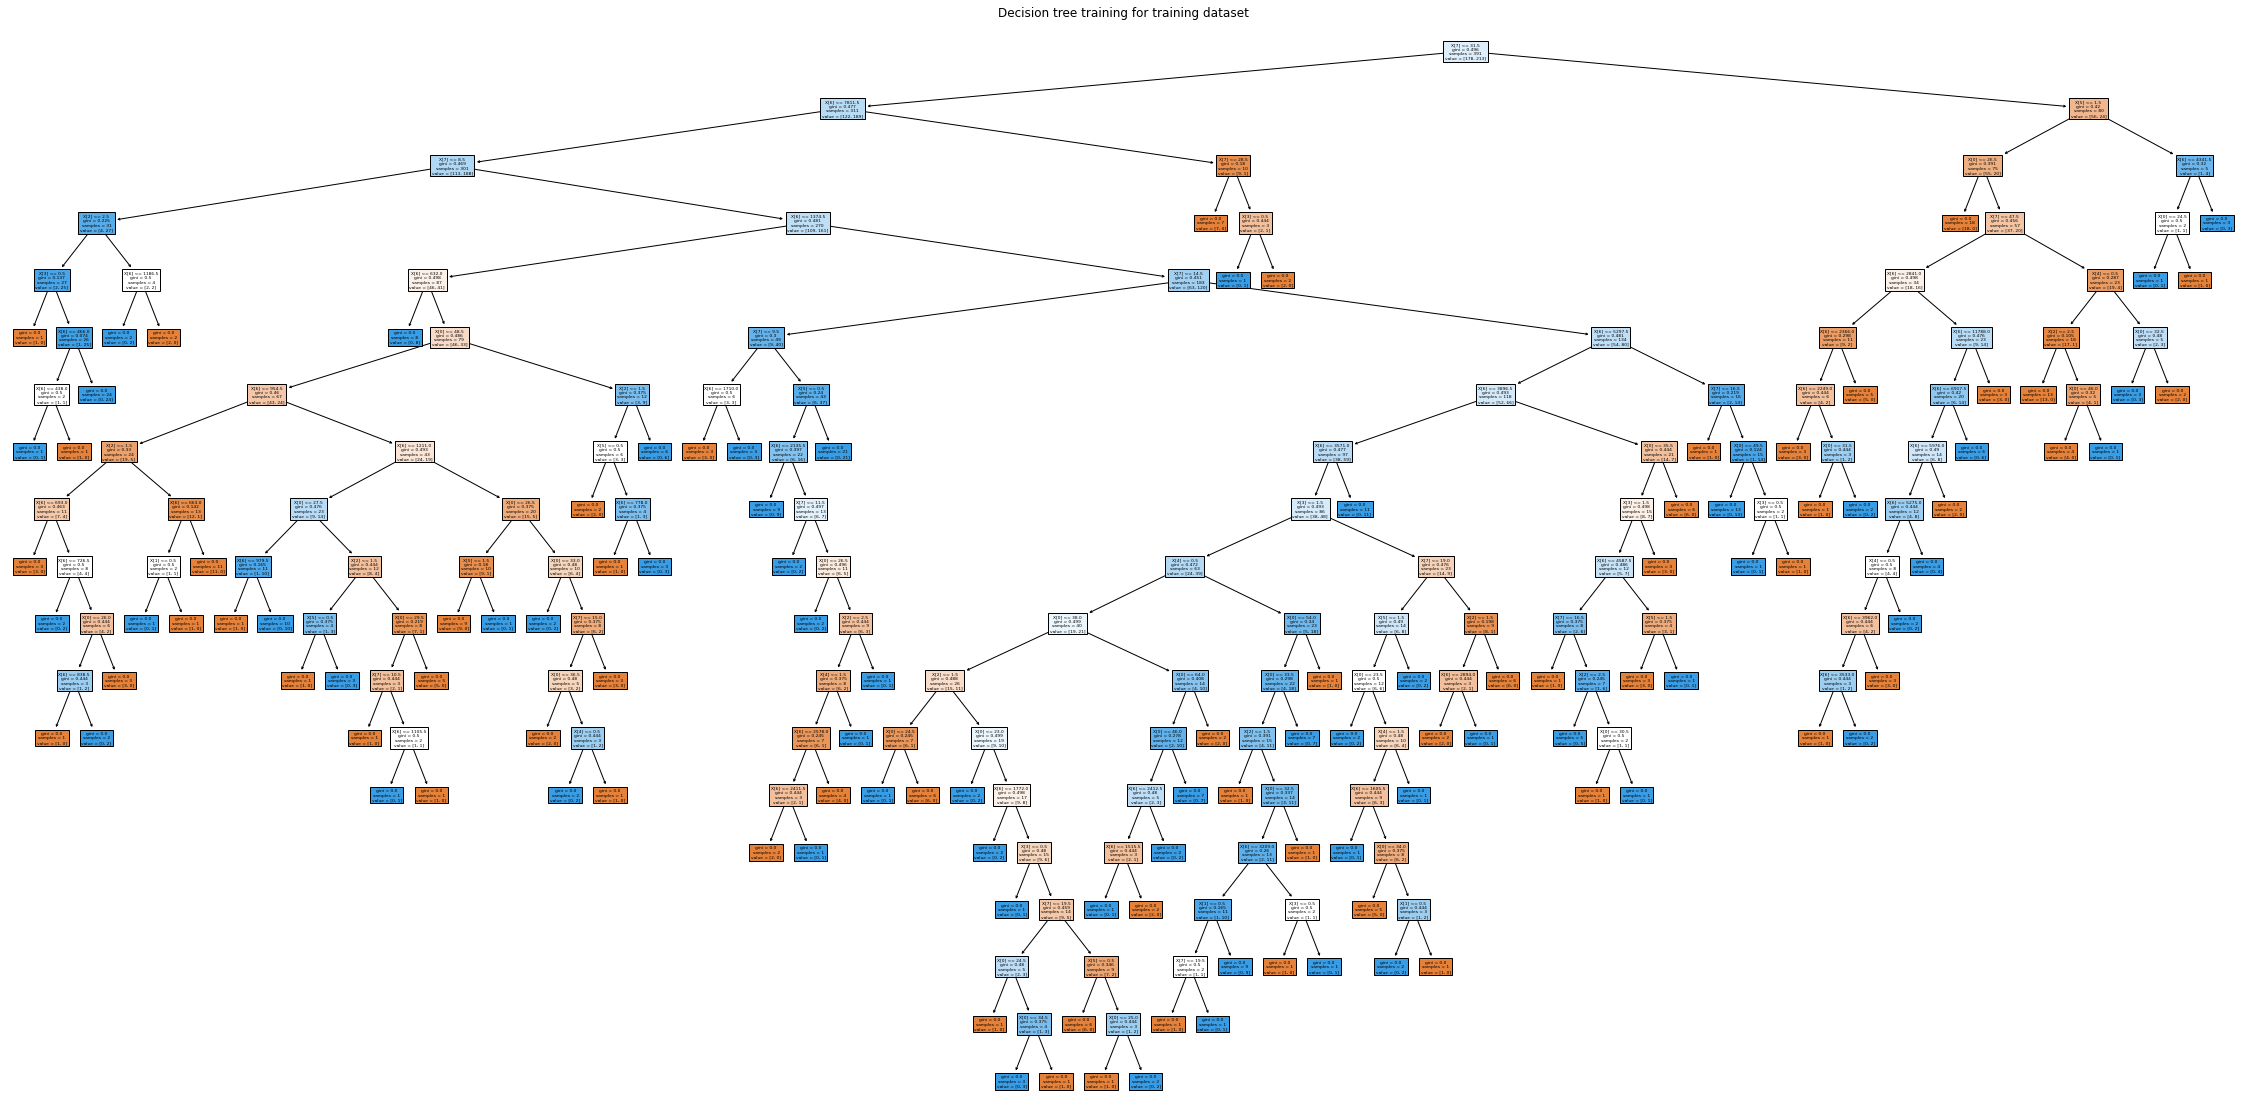

In [136]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(x_train, y_train)
plot_tree(clf, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

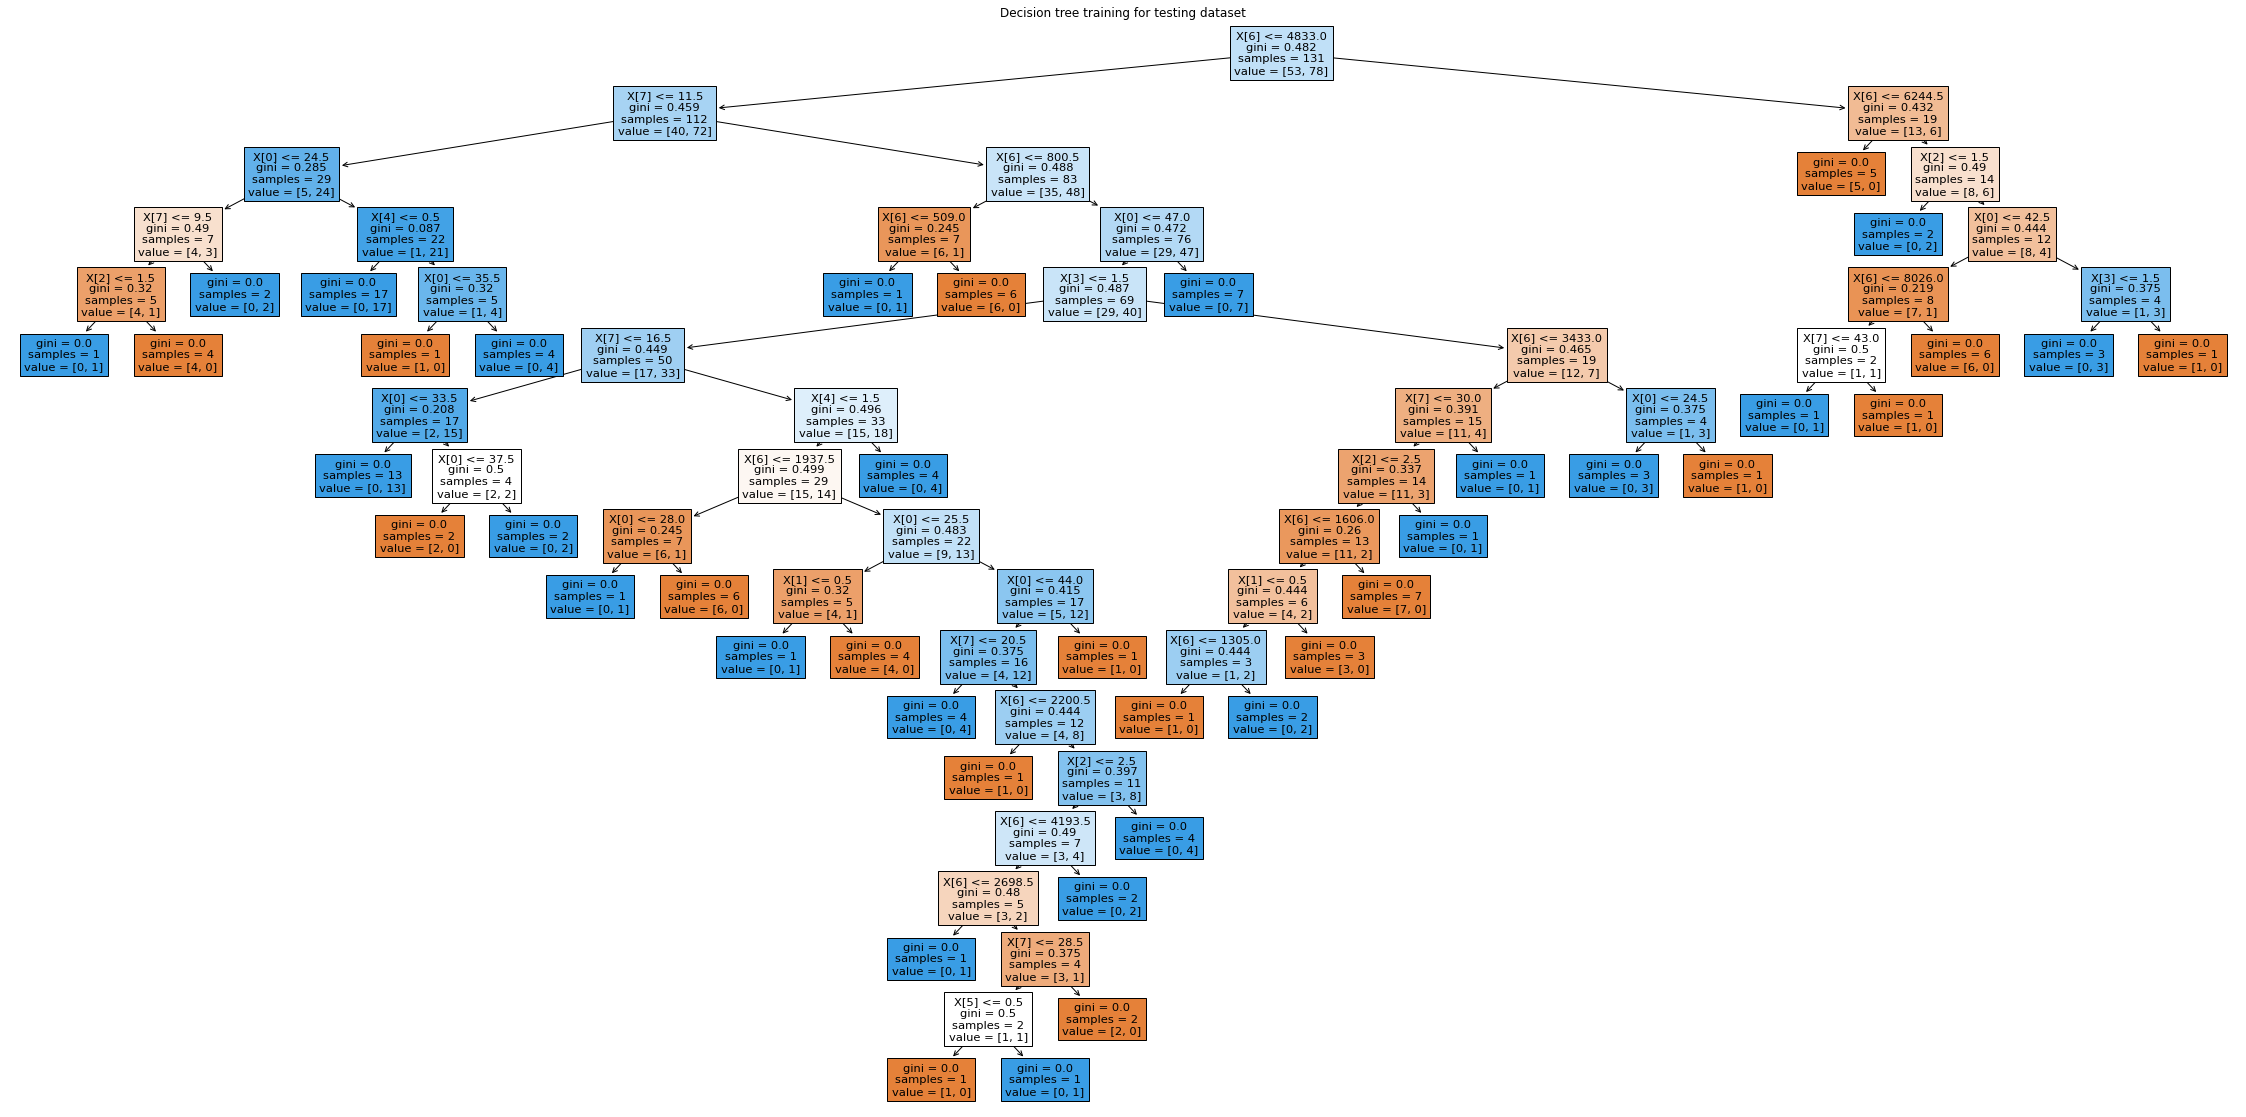

In [137]:
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf = DecisionTreeClassifier()

# output size of decision tree
plt.figure(figsize=(40,20))

# providing the training dataset
clf = clf.fit(x_test, y_test)
plot_tree(clf, filled=True)
plt.title("Decision tree training for testing dataset")
plt.show()

In [138]:
# importing the tree
from sklearn import tree

# text based tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_6 <= 4833.00
|   |--- feature_7 <= 11.50
|   |   |--- feature_0 <= 24.50
|   |   |   |--- feature_7 <= 9.50
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_7 >  9.50
|   |   |   |   |--- class: 1
|   |   |--- feature_0 >  24.50
|   |   |   |--- feature_4 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.50
|   |   |   |   |--- feature_0 <= 35.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  35.50
|   |   |   |   |   |--- class: 1
|   |--- feature_7 >  11.50
|   |   |--- feature_6 <= 800.50
|   |   |   |--- feature_6 <= 509.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  509.00
|   |   |   |   |--- class: 0
|   |   |--- feature_6 >  800.50
|   |   |   |--- feature_0 <= 47.00
|   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |--- feature_7 <= 16.50
|   |   |   |   |   |   |--- feature_0 <=

# Confusion Matrix

In [139]:
# importing standard scalling method from sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

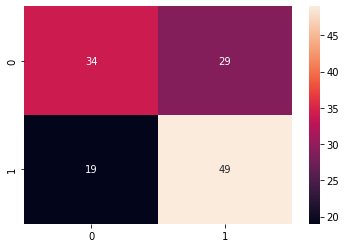

In [140]:
# providing the inputs for the scalling purpose
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

# entropy means information gain
classifer=DecisionTreeClassifier(criterion='entropy', random_state=0)

# providing the training dataset
classifer.fit(X_train,y_train)
y_pred= classifer.predict(X_test)

# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

# Making the Confusion Matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

# Confusion Matrix by Binary Classification

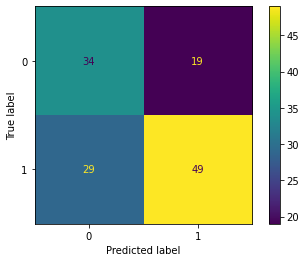

In [141]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

## Precision Score

In [142]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,y_pred)

0.7205882352941176

In [143]:
recall_score(y_test,y_pred)

0.6282051282051282

# Acuracy Score

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6335877862595419

# ROC

In [145]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

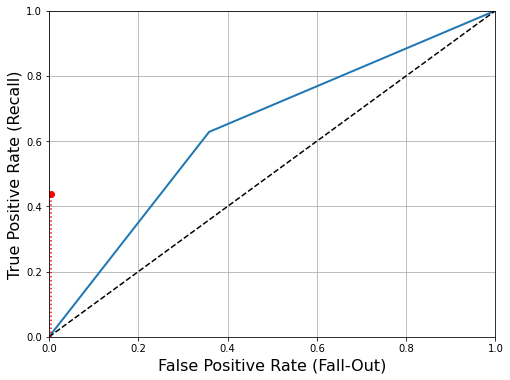

In [146]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [147]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6348572810836962

# 10 FOLD CROSS VALIDATION

In [148]:
# evaluate a logistic regression model using k-fold cross-validation


In [150]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

NameError: ignored

# TRAINING AND TESTING DATA OF DECISION TREE


Depth & leaf nodes =  2
accuracy of Decision Tree =  0.6335877862595419


AttributeError: ignored

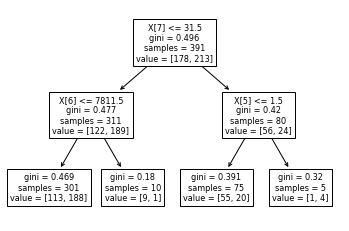

In [151]:
for i in range(2, 8):
    tree_clf = DecisionTreeClassifier(max_depth=i, min_samples_leaf=i, splitter="best", random_state=42)
    tree_clf.fit(x_train, y_train)
    plot_tree(tree_clf)
    print("")
    res_pred = tree_clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Depth & leaf nodes = ", i)
    print("accuracy of Decision Tree = ",accuracy)
    #Precision, recall, f1-score
    print(cm.classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC of Decision Tree = ",roc_auc)

# NEW DATASET WITH 30% IN TEST CASE

In [152]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_train, y_train, test_size=0.30, random_state=42)
res_pred = tree_clf.predict(nX_test)
accuracy_score(ny_test, res_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5169491525423728

# NEW DATASET WITH 60% IN TEST CASE

In [153]:
nX_train, nX_test, ny_train, ny_test = train_test_split(X_train, y_train, test_size=0.60, random_state=42)
res_pred = tree_clf.predict(nX_test)
accuracy_score(ny_test, res_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.5404255319148936

In [154]:
x_train.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
44,58,0,1,0,0,0,6143,48
701,46,1,2,0,0,0,6331,48
338,28,1,2,1,0,0,4169,24
790,39,0,2,1,0,1,1188,21
631,44,1,2,1,0,0,1553,18


## MultinomialNB

In [155]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


MultinomialNB(alpha=0.0, class_prior=[0.4, 0.6])

In [156]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [157]:
test_score = model.score(x_test, y_test)
print("MultinomialNB Score:", test_score)

MultinomialNB Score: 0.6259541984732825


In [158]:
train_score = model.score(x_train, y_train)
print("MultinomialNB Score:",train_score)

MultinomialNB Score: 0.578005115089514


In [159]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'fit_time': array([0.01021314, 0.00653934, 0.00526786, 0.0054028 , 0.00611591]),
 'score_time': array([0.00579882, 0.0038867 , 0.00289178, 0.0037086 , 0.00293422]),
 'test_score': array([0.53164557, 0.6025641 , 0.6025641 , 0.58974359, 0.58974359])}

In [160]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,23,30
1,19,59


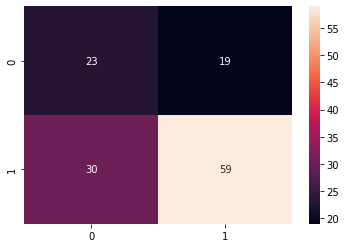

In [161]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Conffusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

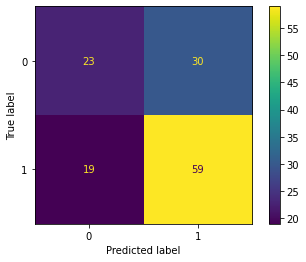

In [162]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [163]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.6629213483146067

In [164]:
recall_score(y_test,predict)

0.7564102564102564

In [165]:
f1_score(y_test,predict)

0.7065868263473053

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6259541984732825

In [167]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

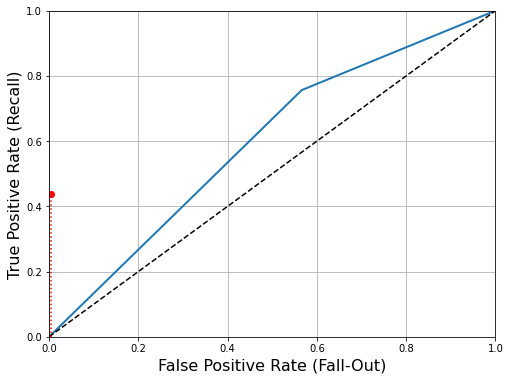

In [168]:
 def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [169]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.5951862602806

In [170]:
## GAUSIAN NB

In [171]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [172]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [173]:
test_score = model.score(x_test, y_test)
print("GaussianNB Score:", test_score)

GaussianNB Score: 0.5877862595419847


In [174]:
train_score = model.score(x_train, y_train)
print("GaussianNB Score:",train_score)

GaussianNB Score: 0.639386189258312


In [175]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

{'fit_time': array([0.00462055, 0.00280285, 0.00236464, 0.00234938, 0.00240421]),
 'score_time': array([0.00398159, 0.00217605, 0.00170326, 0.00185204, 0.00182557]),
 'test_score': array([0.59493671, 0.65384615, 0.64102564, 0.6025641 , 0.65384615])}

In [176]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,19,34
1,20,58


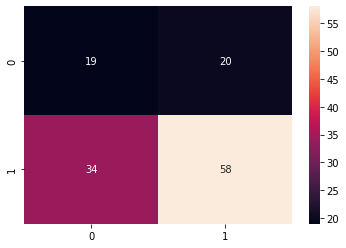

In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

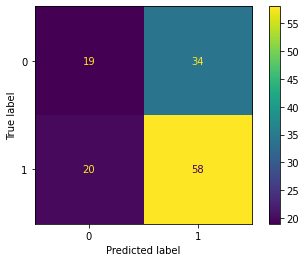

In [179]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [180]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.6304347826086957

In [181]:
recall_score(y_test,predict)

0.7435897435897436

In [182]:
f1_score(y_test,predict)

0.6823529411764706

In [183]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.5877862595419847

In [184]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

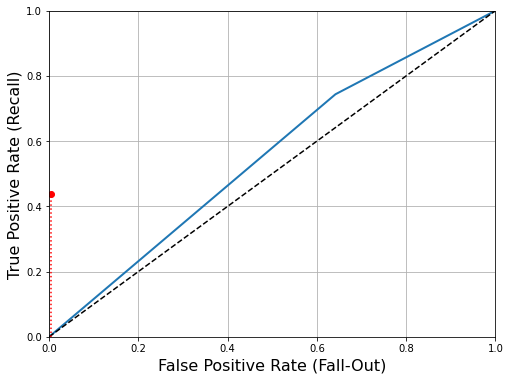

In [185]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [186]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.5510401548137398

## Complement Naive Bayes

In [187]:
from sklearn.naive_bayes import ComplementNB
model = ComplementNB()
model.fit(x_train, y_train)

ComplementNB()

In [188]:
predict = model.predict(x_test)
predict

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1])

In [189]:
test_score = model.score(x_test, y_test)
print("Complement_NB", test_score)

Complement_NB 0.6259541984732825


In [190]:
train_score = model.score(x_train, y_train)
print("Complement_NB:",train_score)

Complement_NB: 0.5703324808184144


In [191]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

{'fit_time': array([0.00479984, 0.00456333, 0.00397396, 0.00409317, 0.00410104]),
 'score_time': array([0.00288296, 0.00297141, 0.00279069, 0.00269651, 0.00251603]),
 'test_score': array([0.53164557, 0.6025641 , 0.6025641 , 0.56410256, 0.58974359])}

In [192]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,25,28
1,21,57


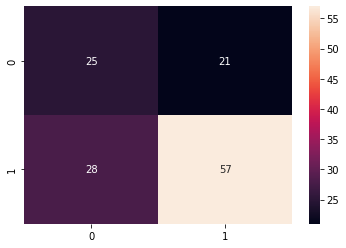

In [193]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

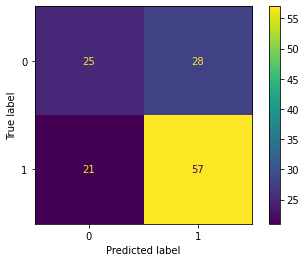

In [194]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [195]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.6705882352941176

In [196]:
recall_score(y_test,predict)

0.7307692307692307

In [197]:
f1_score(y_test,predict)

0.6993865030674846

In [198]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6259541984732825

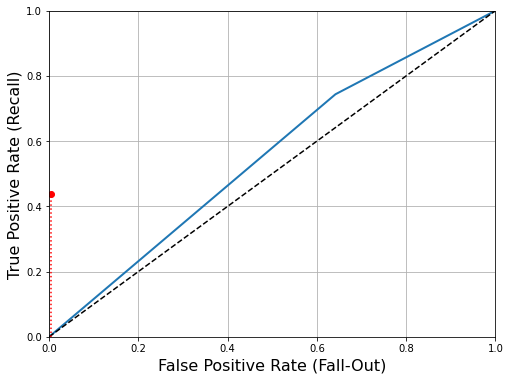

In [199]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [200]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.601233671988389

## Bernoulli Naive Bayes

In [201]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB(alpha=0.0, class_prior=[0.4, 0.6])
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


BernoulliNB(alpha=0.0, class_prior=[0.4, 0.6])

In [202]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1])

In [203]:
test_score = model.score(x_test, y_test)
print("Bernouli_score:", test_score)

Bernouli_score: 0.6030534351145038


In [204]:
train_score = model.score(x_train, y_train)
print("Bernouli_score:",train_score)

Bernouli_score: 0.5626598465473146


In [206]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


{'fit_time': array([0.00639391, 0.00509906, 0.01081491, 0.00463986, 0.00564718]),
 'score_time': array([0.00310588, 0.00340486, 0.00283861, 0.00969768, 0.00315952]),
 'test_score': array([0.53164557, 0.53846154, 0.48717949, 0.57692308, 0.56410256])}

In [207]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,14,39
1,13,65


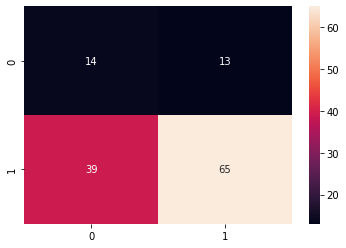

In [208]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

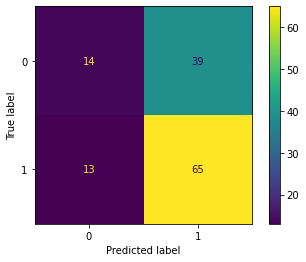

In [209]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [210]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.625

In [211]:
recall_score(y_test,predict)

0.8333333333333334

In [212]:
f1_score(y_test,predict)

0.7142857142857143

In [213]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.6030534351145038

In [214]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

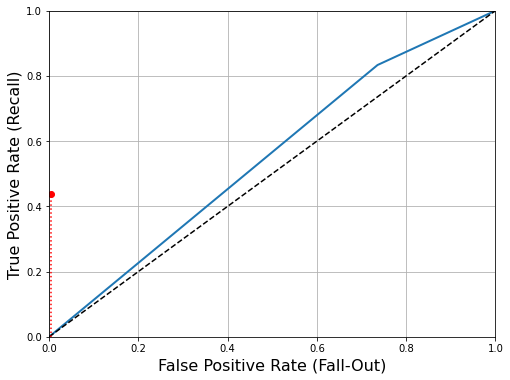

In [215]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [216]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.5487421383647799

## Categorical Naive Bayes

In [217]:
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB(alpha=1)
model.fit(x_train, y_train)


CategoricalNB(alpha=1)

In [218]:
x_train

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
44,58,0,1,0,0,0,6143,48
701,46,1,2,0,0,0,6331,48
338,28,1,2,1,0,0,4169,24
790,39,0,2,1,0,1,1188,21
631,44,1,2,1,0,0,1553,18
...,...,...,...,...,...,...,...,...
566,36,1,2,1,0,0,1372,12
407,27,1,2,1,0,0,1053,15
313,25,1,1,1,0,1,685,12
500,27,0,2,1,0,0,3123,24


In [219]:
predict = model.predict(x_test)
predict

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [220]:
test_score = model.score(x_test, y_test)
print("CatagoricalNB_score:", test_score)


CatagoricalNB_score: 0.5877862595419847


In [221]:
train_score = model.score(x_train, y_train)
print("CatagoricalNB_score:",train_score)

CatagoricalNB_score: 0.8925831202046036


In [222]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, x_train, y_train, cv=5 )
cv_results

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 83, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py", line 1461, in _joint_log_likelihood
    jll += self.feature_log_prob_[i][:, indices].T
Index

{'fit_time': array([0.00738764, 0.01762462, 0.00844264, 0.00740767, 0.0113585 ]),
 'score_time': array([0.00510621, 0.00804591, 0.00669909, 0.00311303, 0.00292969]),
 'test_score': array([       nan, 0.64102564, 0.56410256,        nan, 0.56410256])}

In [223]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
Risk,,
0,25,28
1,26,52


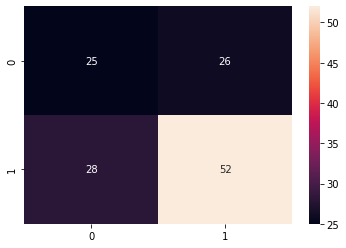

In [224]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predict)

# Making the Confusion Matrix
cm = confusion_matrix(predict, y_test)
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

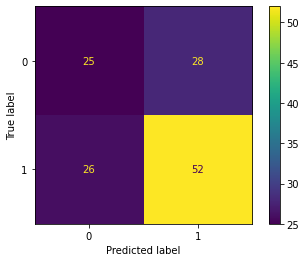

In [225]:
# importing the required modules
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot the confusion matrix in graph
cm = confusion_matrix(y_test,predict, labels=classifer.classes_)

# ploting with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

# showing the matrix
plt.show()

In [226]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test,predict)

0.65

In [227]:
recall_score(y_test,predict)

0.6666666666666666

In [228]:
f1_score(y_test,predict)

0.6582278481012659

In [229]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predict)

0.5877862595419847

In [230]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, predict)

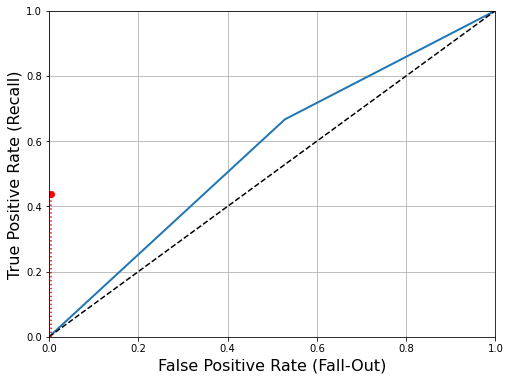

In [231]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [232]:
# Roc Score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predict)

0.5691823899371069

# LAB 9

In [233]:
##Linear Regeration

In [234]:
from sklearn.linear_model import LinearRegression 


In [235]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [236]:
y_prediction=model.predict(x_test)
y_prediction

array([0.72954916, 0.71997239, 0.98444044, 0.15009802, 0.48933854,
       0.49929581, 0.59635767, 0.5336549 , 0.48451692, 0.53007872,
       0.63302541, 0.76901399, 0.44195703, 0.71551903, 0.36749557,
       0.79725877, 0.69914738, 0.63522792, 0.30758603, 0.49285323,
       0.66023339, 0.73391634, 0.65542721, 0.38070562, 0.36595837,
       0.80446719, 0.52263608, 0.64403999, 0.40538049, 0.57099035,
       0.26737899, 0.56524126, 0.84624075, 0.61716423, 0.5684061 ,
       0.54673269, 0.52552765, 0.66708561, 0.62197638, 0.59912348,
       0.4158352 , 0.41858389, 0.5682609 , 0.40636213, 0.45799771,
       0.57260955, 0.33776329, 0.58795848, 0.83309149, 0.50109981,
       0.71994357, 0.78276689, 0.71016917, 0.61869979, 0.50788092,
       0.73362516, 0.37682707, 0.75364279, 0.56455526, 0.55393919,
       0.82555072, 0.59892998, 0.4629289 , 0.89112546, 0.57221147,
       0.43023023, 0.41880807, 0.56797614, 0.58955618, 0.57454463,
       0.49641631, 0.74057358, 0.30022178, 0.74081831, 0.65759

In [237]:
##Logistic Regression

In [238]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [239]:
x_test = np.array([[x] for x in x_test])
y_test = np.ravel(y_test)
model = LogisticRegression(C=1000000.)
model = model.fit(x_test,y_test)

print('coef', model.coef_)
print('intercept', model.intercept_)

ValueError: ignored